In [1]:
# EDA için kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

# Grafikleri göstermek için
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

# Makine öğrenmesi algoritmaları, veri ön işleme ve değerlendirme için sklearn kütüphanesi
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, auc

# Uyarılardan kurtulmak için
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

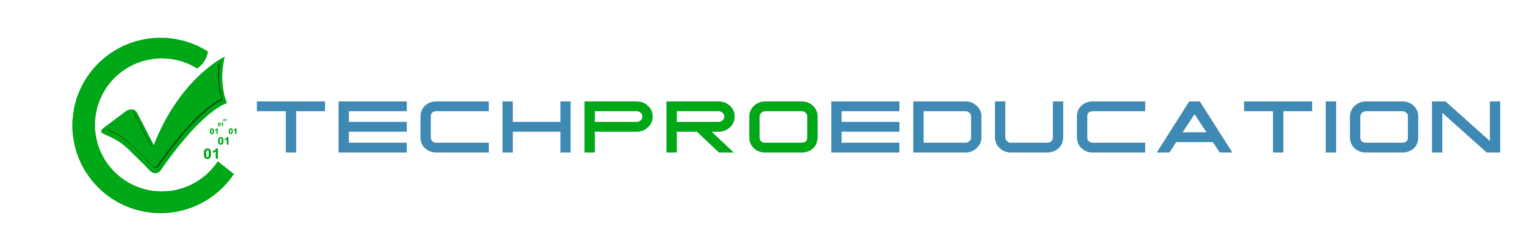

# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

# Exploratory Data Analysis and Visualization

In [117]:
df = pd.read_csv("adult.csv")
df.sample(10)

age     workclass  fnlwgt     education  education.num  \
18509   25       Private  188507       7th-8th              4   
1170    36       Private  224566    Assoc-acdm             12   
15068   48       Private  172709       HS-grad              9   
16446   50  Self-emp-inc  104849   Prof-school             15   
3433    43       Private  177905       HS-grad              9   
28544   51  Self-emp-inc   46281  Some-college             10   
4603    33       Private  208405       Masters             14   
7050    37       Private  286026       HS-grad              9   
6966    41       Private  179533       HS-grad              9   
7764    52       Private  202956       7th-8th              4   

           marital.status         occupation    relationship  \
18509       Never-married  Machine-op-inspct  Other-relative   
1170        Never-married     Prof-specialty   Not-in-family   
15068            Divorced      Other-service       Unmarried   
16446  Married-civ-spouse     Prof-specialty         Husband   
3433   Married-civ-spouse  Handlers-cleaners         Husband   
28544  Married-civ-spouse              Sales         Husband   
4603   Married-civ-spouse     Prof-specialty         Husband   
7050   Married-civ-spouse     Prof-specialty         Husband   
6966   Married-civ-spouse   Transport-moving         Husband   
7764   Married-civ-spouse       Craft-repair         Husband   

                     race     sex  capital.gain  capital.loss  hours.per.week  \
18509               White  Female             0             0              40   
1170                White    Male             0          1669              45   
15068               Black  Female             0             0              40   
16446  Asian-Pac-Islander    Male             0             0              40   
3433                White    Male          3908             0              40   
28544               White    Male             0             0              50   
4603                White    Male             0             0              50   
7050                White    Male             0             0              40   
6966                White    Male             0             0              35   
7764                White    Male             0             0              40   

           native.country income  
18509  Dominican-Republic  <=50K  
1170        United-States  <=50K  
15068       United-States  <=50K  
16446               India  <=50K  
3433        United-States  <=50K  
28544       United-States   >50K  
4603        United-States   >50K  
7050        United-States   >50K  
6966        United-States  <=50K  
7764        United-States  <=50K

In [118]:
df.shape

(32561, 15)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [120]:
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

In [121]:
df.describe().T

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education.num   32561.0      10.080679       2.572720      1.0       9.0   
capital.gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital.loss    32561.0      87.303830     402.960219      0.0       0.0   
hours.per.week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education.num       10.0      12.0       16.0  
capital.gain         0.0       0.0    99999.0  
capital.loss         0.0       0.0     4356.0  
hours.per.week      40.0      45.0       99.0

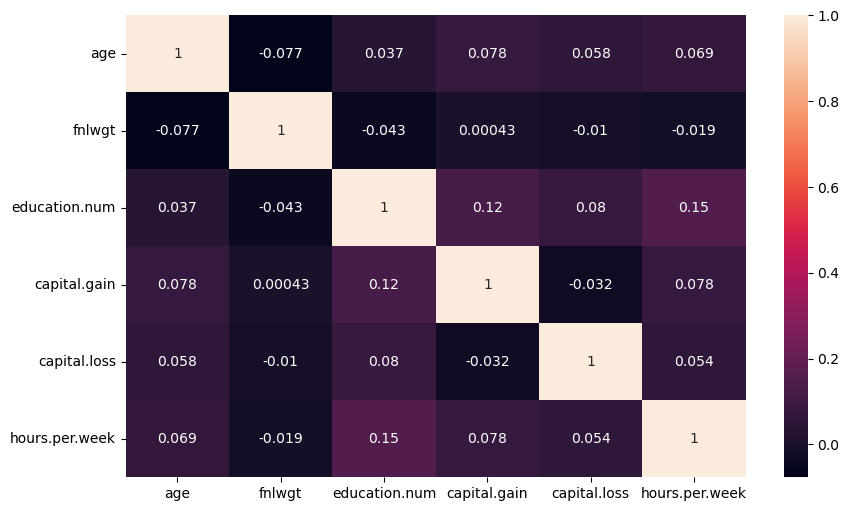

In [122]:
sns.heatmap(df.corr(), annot=True);

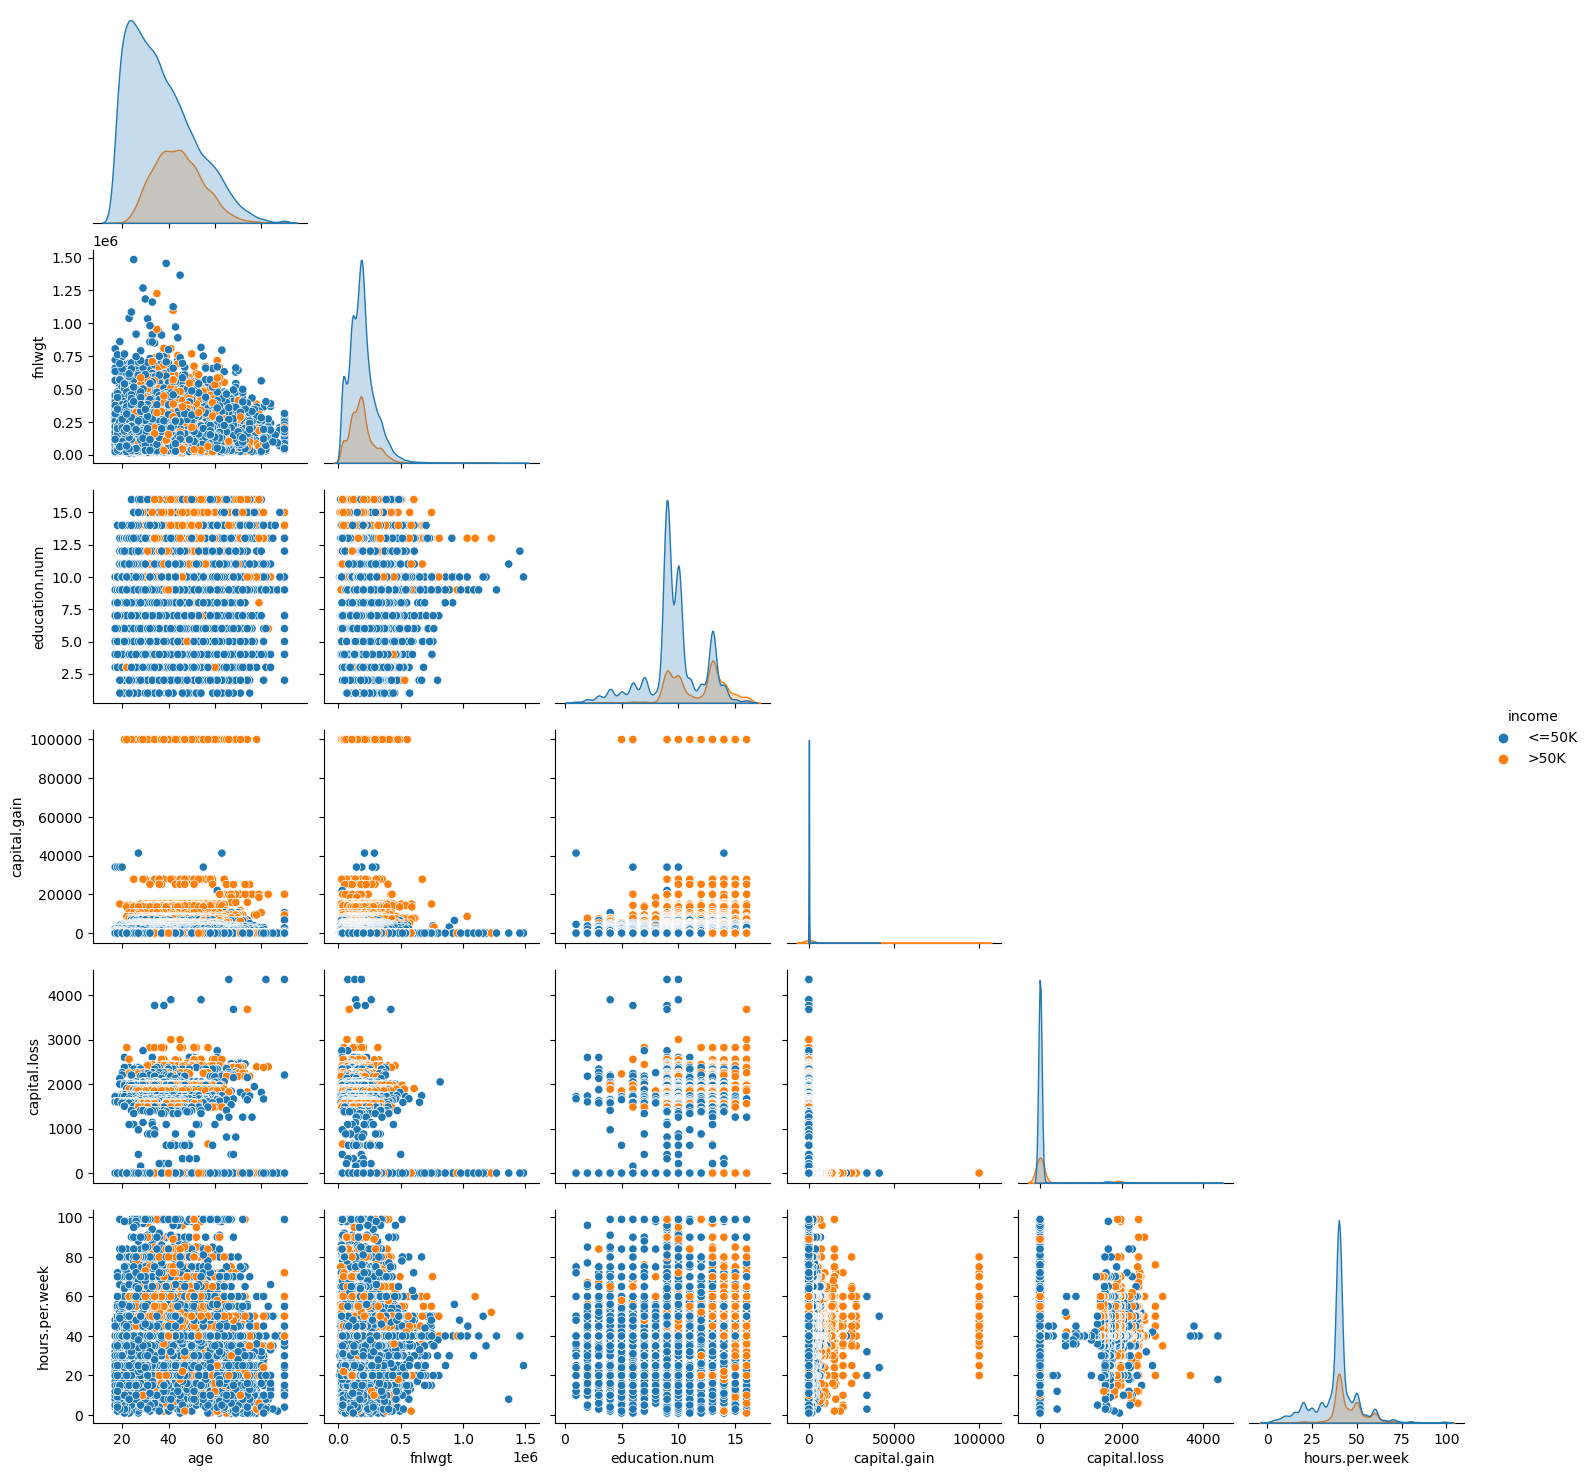

In [9]:
sns.pairplot(df, hue = "income", corner=True);

## Clean-up Activities

In [123]:
df.duplicated().sum()

24

In [124]:
df = df.drop_duplicates()

In [125]:
df.duplicated().sum()

0

In [126]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

In [127]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [128]:
for col in df.select_dtypes(include = "object"):
    print(col)
    print("***")
    print(df[col].value_counts())
    print("***********")

workclass
***
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
***********
education
***
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
***********
marital.status
***
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64
***********
occupation
***
Prof

In [129]:
df.isin(["?"]).any()

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

In [130]:
df.isin(["?"]).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [131]:
df.replace("?", "Unknown", inplace=True)

In [132]:
df.isin(["?"]).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [133]:
df.groupby("education")["education.num"].value_counts(dropna=False)
# Education_num is inline with degree of educations so one of them (columns) is not needed.

education     education.num
10th          6                  933
11th          7                 1175
12th          8                  433
1st-4th       2                  166
5th-6th       3                  332
7th-8th       4                  645
9th           5                  514
Assoc-acdm    12                1067
Assoc-voc     11                1382
Bachelors     13                5353
Doctorate     16                 413
HS-grad       9                10494
Masters       14                1722
Preschool     1                   50
Prof-school   15                 576
Some-college  10                7282
Name: education.num, dtype: int64

In [134]:
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', '12th'], 'School', inplace = True)

In [22]:
px.histogram(df, x='education', color=df.income, barmode='group', title='Income Distribution by Education Level')

In [135]:
df.drop("education.num", axis = 1, inplace=True)

In [136]:
df.groupby("relationship")["marital.status"].value_counts(dropna=False)

relationship    marital.status       
Husband         Married-civ-spouse       13178
                Married-AF-spouse            9
Not-in-family   Never-married             4694
                Divorced                  2403
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Own-child       Never-married             4481
                Divorced                   328
                Separated                   99
                Married-civ-spouse          95
                Married-spouse-absent       45
                Widowe

In [137]:
df.relationship = df.relationship.replace(["Not-in-family", "Other-relative",np.nan], "Unmarried")
df.relationship

0        Unmarried
1        Unmarried
2        Unmarried
3        Unmarried
4        Own-child
           ...    
32556    Unmarried
32557         Wife
32558      Husband
32559    Unmarried
32560    Own-child
Name: relationship, Length: 32537, dtype: object

In [138]:
df.relationship.value_counts()

Husband      13187
Unmarried    12718
Own-child     5064
Wife          1568
Name: relationship, dtype: int64

In [27]:
px.histogram(df, x='marital.status', color="income", barmode='group', title='Income Distribution by Marital Status')

In [139]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [140]:
df["income"].value_counts() 

0    24698
1     7839
Name: income, dtype: int64

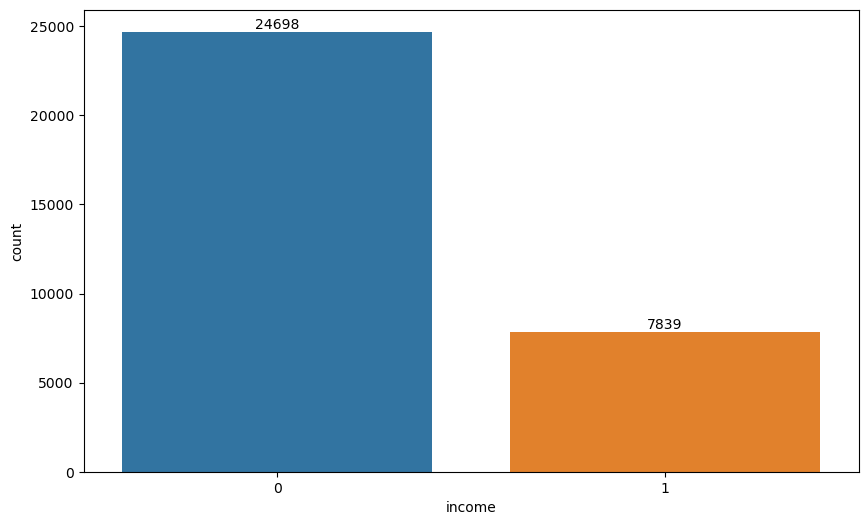

In [30]:
ax= sns.countplot(df["income"])
ax.bar_label(ax.containers[0]); 

In [31]:
income_distr = df['income'].value_counts().reset_index()
income_distr.columns = ['index', 'income']  # Sütun isimlerini değiştirin
fig = px.pie(income_distr, values='income', names='index')
fig.update_layout(title="Income Distribution")
fig.show()

In [141]:
df['capital_diff'] = df['capital.gain'] - df['capital.loss']
df['capital_diff'] = pd.cut(df['capital_diff'], bins = [-5000, 5000, 100000], labels = ['Low', 'High'])
df['capital_diff'] = df['capital_diff'].astype('object')
df.drop(['capital.gain'], axis = 1, inplace = True)
df.drop(['capital.loss'], axis = 1, inplace = True)

In [142]:
df["capital_diff"].value_counts() 

Low     30889
High     1648
Name: capital_diff, dtype: int64

In [34]:
px.histogram(df, x='capital_diff', color="income", barmode='group', title='Income Distribution by Capital Diff')

In [35]:
# Get detailed info about dataset (Mert Bey'den);

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [36]:
get_unique_values(df)

Column Name  Number of Unique Values  \
0              age                       73   
1        workclass                        9   
2           fnlwgt                    21648   
3        education                       10   
4   marital.status                        7   
5       occupation                       15   
6     relationship                        4   
7             race                        5   
8              sex                        2   
9   hours.per.week                       94   
10  native.country                       42   
11          income                        2   
12    capital_diff                        2   

                                       Unique Values  Data Type  
0                                                   -     int64  
1   [Unknown, Private, State-gov, Federal-gov, Sel...    object  
2                                                   -     int64  
3   [HS-grad, Some-college, School, Doctorate, Pro...    object  
4   [Widowed, Divorced, Separated, Never-married, ...    object  
5                                                   -    object  
6               [Unmarried, Own-child, Husband, Wife]    object  
7   [White, Black, Asian-Pac-Islander, Other, Amer...    object  
8                                      [Female, Male]    object  
9                                                   -     int64  
10                                                  -    object  
11                                             [0, 1]     int64  
12                                        [Low, High]    object

# Train Test Split

In [154]:
#Define our target and features
X= df.drop(columns="income")
y= df.income

In [155]:
# as dataset is imbalanced, use stratify=y 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [156]:
#Instead of get dummies we use one hot encoding and ordinal encoding as below
cat_onehot = ['workclass', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'marital.status']
cat_ordinal = ['education', 'capital_diff']
    
cat_for_edu = ['Preschool', 'School', 'HS-grad','Some-college', 'Assoc-voc', 'Assoc-acdm','Bachelors', 'Masters', 'Prof-school', 'Doctorate']
cat_for_capdiff = ['Low', 'High']

In [157]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       (OrdinalEncoder(categories= [cat_for_edu, cat_for_capdiff]), cat_ordinal),
                                       remainder='passthrough') # MinMaxScaler()


# make_column_transformer fonksiyonu featurlara yapılacak dönüşümleri otomotize eder. Bu fonksiyonun içerisine vereceğimiz
# sıralamaya göre featurlara sıra ile dönüşüm uygular.

# (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot) kodu ne yapar?
# handle_unknown = "ignore" parametresi ile test setinde geçip train setinde geçmeyen kategorik verilerin tümü
# 0'a dönüştürecek şekilde cat_onehot listesinde bulunan bütün featurlara onehotencoder dönüşümü yapar.

# (OrdinalEncoder(categories=categories), cat_ordinal) kodu ne yapar?
# ilgili featurlara onehotencoder dönüşümü yapıldıktan sonra cat_ordinal listesinde bulunan bütün featurlara categories
# listesi içerisindeki unique kategorik gözlemlerin hiyerarşik sıralamasına göre ordinal encoder dönüşümü yapar.

# remainder='passthrough' ile dönüşüm yapılmayan diğer tüm featurları olduğu gibi bırak anlamına gelir.
# eğer remainder defaul değeri ile "drop" olarak bırakılırsa dönüşüm yapılmayan tüm featurlar df'den drop edilir.
# remainder= MinMaxScaler() veya StandardScale() yaparsak dönüşüm yapılmayan featurlar haricindeki diğer featurlara
# scale işlem uygulanır.


In [41]:
X_train.shape, X_test.shape

((26029, 12), (6508, 12))

In [160]:
column_trans.fit_transform(X_train)

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.20000e+01,
        1.89203e+05, 5.00000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.20000e+01,
        1.52878e+05, 4.00000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 4.30000e+01,
        1.76138e+05, 5.00000e+01],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.10000e+01,
        1.80303e+05, 2.50000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.50000e+01,
        9.87760e+04, 4.00000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 6.20000e+01,
        1.15176e+05, 6.50000e+01]])

In [161]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [44]:
X_train_trans.shape, X_test_trans.shape

((26029, 89), (6508, 89))

In [45]:
X_train_trans

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.20000e+01,
        1.89203e+05, 5.00000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.20000e+01,
        1.52878e+05, 4.00000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 4.30000e+01,
        1.76138e+05, 5.00000e+01],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.10000e+01,
        1.80303e+05, 2.50000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.50000e+01,
        9.87760e+04, 4.00000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 6.20000e+01,
        1.15176e+05, 6.50000e+01]])

In [46]:
column_trans.get_feature_names_out()

array(['onehotencoder__workclass_Federal-gov',
       'onehotencoder__workclass_Local-gov',
       'onehotencoder__workclass_Never-worked',
       'onehotencoder__workclass_Private',
       'onehotencoder__workclass_Self-emp-inc',
       'onehotencoder__workclass_Self-emp-not-inc',
       'onehotencoder__workclass_State-gov',
       'onehotencoder__workclass_Unknown',
       'onehotencoder__workclass_Without-pay',
       'onehotencoder__occupation_Adm-clerical',
       'onehotencoder__occupation_Armed-Forces',
       'onehotencoder__occupation_Craft-repair',
       'onehotencoder__occupation_Exec-managerial',
       'onehotencoder__occupation_Farming-fishing',
       'onehotencoder__occupation_Handlers-cleaners',
       'onehotencoder__occupation_Machine-op-inspct',
       'onehotencoder__occupation_Other-service',
       'onehotencoder__occupation_Priv-house-serv',
       'onehotencoder__occupation_Prof-specialty',
       'onehotencoder__occupation_Protective-serv',
       'onehotenco

In [162]:
features = column_trans.get_feature_names_out()

In [163]:
X_train= pd.DataFrame(X_train_trans, columns=features, index=X_train.index)
X_train.head()

onehotencoder__workclass_Federal-gov  \
15733                                   0.0   
14009                                   0.0   
11991                                   0.0   
21171                                   0.0   
32247                                   0.0   

       onehotencoder__workclass_Local-gov  \
15733                                 0.0   
14009                                 0.0   
11991                                 0.0   
21171                                 0.0   
32247                                 0.0   

       onehotencoder__workclass_Never-worked  \
15733                                    0.0   
14009                                    0.0   
11991                                    0.0   
21171                                    0.0   
32247                                    0.0   

       onehotencoder__workclass_Private  \
15733                               1.0   
14009                               1.0   
11991                               1.0   
21171                               1.0   
32247                               0.0   

       onehotencoder__workclass_Self-emp-inc  \
15733                                    0.0   
14009                                    0.0   
11991                                    0.0   
21171                                    0.0   
32247                                    0.0   

       onehotencoder__workclass_Self-emp-not-inc  \
15733                                        0.0   
14009                                        0.0   
11991                                        0.0   
21171                                        0.0   
32247                                        0.0   

       onehotencoder__workclass_State-gov  onehotencoder__workclass_Unknown  \
15733                                 0.0                               0.0   
14009                                 0.0                               0.0   
11991                                 0.0                               0.0   
21171                                 0.0                               0.0   
32247                                 0.0                               1.0   

       onehotencoder__workclass_Without-pay  \
15733                                   0.0   
14009                                   0.0   
11991                                   0.0   
21171                                   0.0   
32247                                   0.0   

       onehotencoder__occupation_Adm-clerical  ...  \
15733                                     0.0  ...   
14009                                     0.0  ...   
11991                                     0.0  ...   
21171                                     0.0  ...   
32247                                     0.0  ...   

       onehotencoder__marital.status_Married-civ-spouse  \
15733                                               0.0   
14009                                               1.0   
11991                                               1.0   
21171                                               0.0   
32247                                               0.0   

       onehotencoder__marital.status_Married-spouse-absent  \
15733                                                0.0     
14009                                                0.0     
11991                                                0.0     
21171                                                0.0     
32247                                                0.0     

       onehotencoder__marital.status_Never-married  \
15733                                          1.0   
14009                                          0.0   
11991                                          0.0   
21171                                          1.0   
32247                                          0.0   

       onehotencoder__marital.status_Separated  \
15733                                      0.0   
14009                                      0.0   
11991            

In [164]:
X_test= pd.DataFrame(X_test_trans, columns=features, index=X_test.index)
X_test.head()

onehotencoder__workclass_Federal-gov  \
12168                                   0.0   
29421                                   0.0   
5732                                    0.0   
1207                                    0.0   
29858                                   0.0   

       onehotencoder__workclass_Local-gov  \
12168                                 0.0   
29421                                 0.0   
5732                                  0.0   
1207                                  0.0   
29858                                 0.0   

       onehotencoder__workclass_Never-worked  \
12168                                    0.0   
29421                                    0.0   
5732                                     0.0   
1207                                     0.0   
29858                                    0.0   

       onehotencoder__workclass_Private  \
12168                               1.0   
29421                               1.0   
5732                                0.0   
1207                                1.0   
29858                               1.0   

       onehotencoder__workclass_Self-emp-inc  \
12168                                    0.0   
29421                                    0.0   
5732                                     0.0   
1207                                     0.0   
29858                                    0.0   

       onehotencoder__workclass_Self-emp-not-inc  \
12168                                        0.0   
29421                                        0.0   
5732                                         1.0   
1207                                         0.0   
29858                                        0.0   

       onehotencoder__workclass_State-gov  onehotencoder__workclass_Unknown  \
12168                                 0.0                               0.0   
29421                                 0.0                               0.0   
5732                                  0.0                               0.0   
1207                                  0.0                               0.0   
29858                                 0.0                               0.0   

       onehotencoder__workclass_Without-pay  \
12168                                   0.0   
29421                                   0.0   
5732                                    0.0   
1207                                    0.0   
29858                                   0.0   

       onehotencoder__occupation_Adm-clerical  ...  \
12168                                     0.0  ...   
29421                                     0.0  ...   
5732                                      0.0  ...   
1207                                      1.0  ...   
29858                                     0.0  ...   

       onehotencoder__marital.status_Married-civ-spouse  \
12168                                               0.0   
29421                                               0.0   
5732                                                1.0   
1207                                                1.0   
29858                                               0.0   

       onehotencoder__marital.status_Married-spouse-absent  \
12168                                                0.0     
29421                                                0.0     
5732                                                 0.0     
1207                                                 0.0     
29858                                                0.0     

       onehotencoder__marital.status_Never-married  \
12168                                          1.0   
29421                                          1.0   
5732                                           0.0   
1207                                           0.0   
29858                                          1.0   

       onehotencoder__marital.status_Separated  \
12168                                      0.0   
29421                                      0.0   
5732             

In [165]:
corr_by_income = X_train.join(y_train).corr()["income"].sort_values()[:-1]
corr_by_income

# datamızdaki tüm featurların target ile olan corr.larına bakmak için X_train ve y_traini join ediyoruz. Ve targetımız 
# olan price ile corr.larını küçükten büyüğe sıralıyoruz. Targetın kendisiyle olan corr.unu görmek istemediğimizden
# slicelama ([:-1]) yapıp -1 ile targetın kanedisini ignore ediyoruz.

onehotencoder__marital.status_Never-married        -0.317532
onehotencoder__relationship_Unmarried              -0.288198
onehotencoder__relationship_Own-child              -0.229712
onehotencoder__sex_Female                          -0.219547
onehotencoder__occupation_Other-service            -0.156838
                                                      ...   
remainder__age                                      0.230813
ordinalencoder__capital_diff                        0.358130
ordinalencoder__education                           0.359451
onehotencoder__relationship_Husband                 0.401847
onehotencoder__marital.status_Married-civ-spouse    0.444951
Name: income, Length: 89, dtype: float64

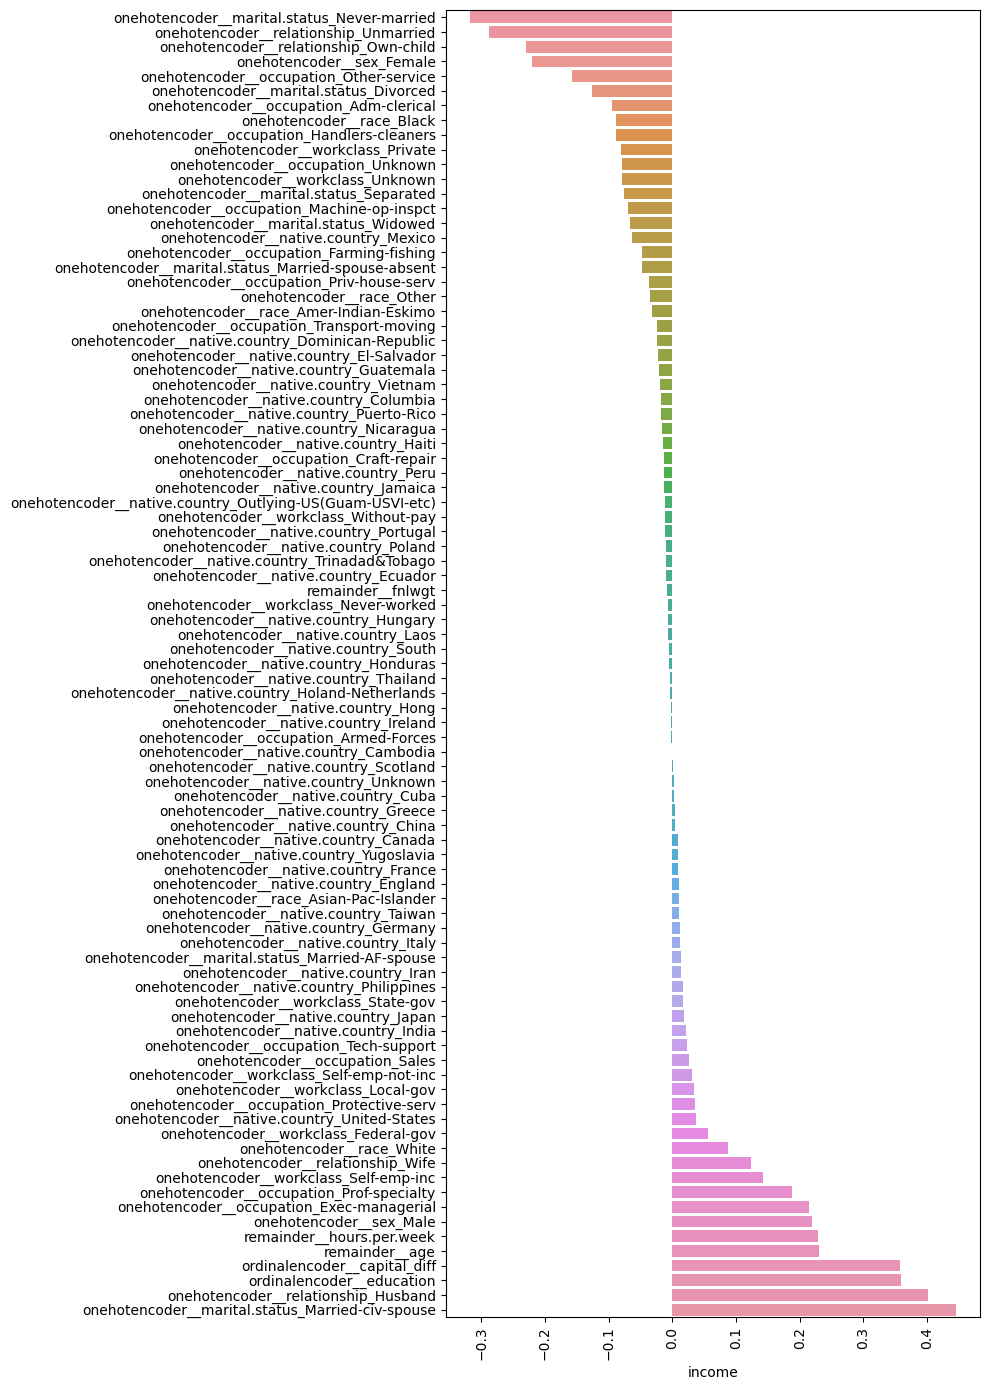

In [51]:
plt.figure(figsize = (10,14))
sns.barplot(y = corr_by_income.index, x = corr_by_income)
plt.xticks(rotation=90)
plt.tight_layout();

# featureler ile target arasındaki corr.ları görselleştiriyoruz.

# Logistic Regression

In [52]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

log_pipe = Pipeline(steps=operations)

log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [53]:
y_pred = log_pipe.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

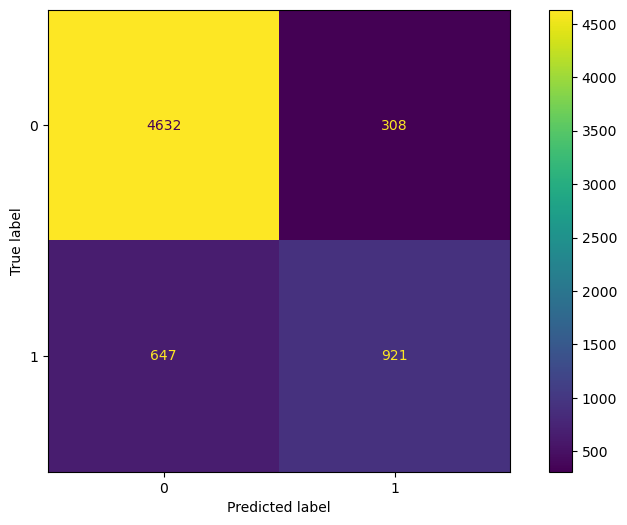

In [54]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_pipe, X_test, y_test)

In [55]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [56]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test) 

Test_Set
[[4632  308]
 [ 647  921]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4940
           1       0.75      0.59      0.66      1568

    accuracy                           0.85      6508
   macro avg       0.81      0.76      0.78      6508
weighted avg       0.85      0.85      0.85      6508


Train_Set
[[18462  1296]
 [ 2586  3685]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     19758
           1       0.74      0.59      0.65      6271

    accuracy                           0.85     26029
   macro avg       0.81      0.76      0.78     26029
weighted avg       0.84      0.85      0.84     26029



## Grid Search CV

In [57]:
# pipeline for logistic regression

#model = Pipeline([("scaler",scaler),("log_model",log_model)]) 

# l1: Lasso, l2: Ridge

#penalty = ["l1", "l2"] 

# -1 ile 5 arasında 20 tane C değeri elde etmek için 
# C arttıkça regülarizasyon düşer, alphanın tersi olarak
# C için np.logspace kullanmanın nedeni, düzenlileştirmenin optimal değerinin genellikle belirli bir aralıkta olmamasıdır.
# Bu nedenle, geniş bir aralıkta farklı değerleri denemek ve en iyi sonucu veren değeri bulmak için logaritmik bir ölçekte
# değerler oluşturmak mantıklıdır.

#C = np.logspace(-1, 5, 20) 

# balanced: sınıf ağırlıkları dengeli, None: sınıf ağırlığı yok

#class_weight= ["balanced", None] 

# dengesiz data setlerinde classları dengelemek için class_weight= "balanced" kullanabiliyoruz. Data dengelendiği zaman
# model az olan sınıfa ait precision scorunu artırarak o sınıfın recall scorunu artırmaya çalışır.

# solver ın dört değeri

#solver = ["liblinear", "sag", "saga"] 

# penalty, C, class_weight ve solver'ın tüm kombinasyonlarını elde etmek için

#param_grid = {"log_model__penalty" : penalty,
#              "log_model__C" : C,
#              "log_model__class_weight":class_weight,
#              "log_model__solver":solver} 

# en iyi modeli elde etmek için
#grid_model = GridSearchCV(estimator=model,
#                          param_grid=param_grid,
#                          cv=10,
#                          scoring = 'f1',   # Default olarak 1 sınıfının scorunu max. eder    
#                          n_jobs = -1) # bütün işlemciler burda çalışsın diye

# GrdiseachCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

log_pipe = Pipeline(steps=operations)

C = [0.01, 0.1, 1]  # C arttıkça regülarizasyon düşer, alphanın tersi olarak
class_weight= ["balanced", None] 
# dengesiz data setlerinde classları dengelemek için class_weight= "balanced" kullanabiliyoruz. 
# class_weight="balanced" kullanarak, modelin az temsil edilen sınıfın örneklerini doğru bir şekilde sınıflandırmaya
# daha fazla odaklanmasını sağlarız, bu genellikle bu sınıfın recall'ını artırabilir.

#solver-penalt hatalarını önlemek için
param_grid = [
    {
        "logistic__penalty" : ['l2', 'none'],
        "logistic__C" : C,
        "logistic__class_weight": class_weight,
        "logistic__solver": ['sag', 'lbfgs']
    },
    {
        "logistic__penalty" : ['l1', 'l2'],
        "logistic__C" : C,
        "logistic__class_weight": class_weight,
        "logistic__solver": ['liblinear', 'saga']
    }
]

cv = StratifiedKFold(n_splits = 10) # unbalanced datalarda kullanılabilir

grid_model = GridSearchCV(estimator=log_pipe,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "f1",   
                          n_jobs = -1,
                          return_train_score=True)


# GrdiseachCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [59]:
log_pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [60]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'logistic__C': [0.01, 0.1, 1],
                          'logistic__class_weight': ['balanced', None],
                          'logistic__penalty': ['l2', 'none'],
                          'logistic__solver': ['sag', 'lbfgs']},
                         {'logistic__C': [0.01, 0.1, 1],
                          'logistic__class_weight': ['balanced', None],
                          'logistic__penalty': ['l1', 'l2'],
                          'logistic__solver': ['liblinear', 'saga']}],
             return_train_score=True, scoring='f1')

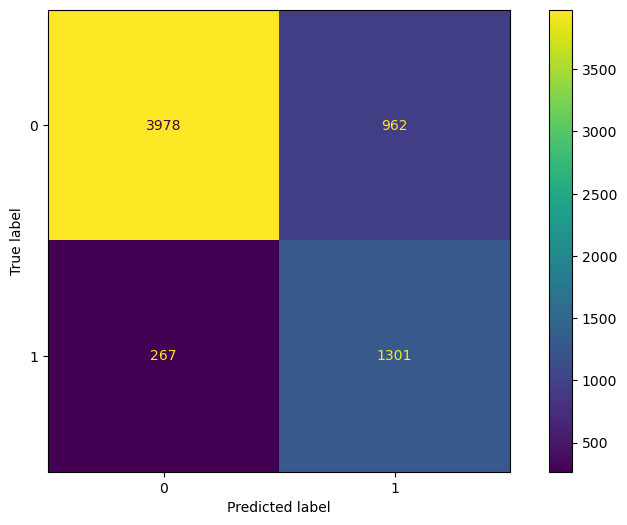

In [61]:
plot_confusion_matrix(grid_model, X_test, y_test)

In [62]:
pd.DataFrame(grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]


# ilgili df'in best indexinden "mean_test_score" ile "mean_train_score" ları çekilip karşılaştırılırak overfitting,
# underfitting değerlendirilmesi yapılır. 

# GridsearchCV aynı zamanda Cross validation işlemi de yaptığından extradan cross validation yapmamıza gerek yok.

# Burda aldığımız scorelar gridsearchcv içerisine verdiğimiz scoring metricinin scorelarıdır.

mean_test_score     0.681286
mean_train_score    0.683398
Name: 1, dtype: object

In [63]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)  

# 0 label'ı için konuşacak olursak. 
# precision 0.94 demek yaptığım tahminlerin %94'ü isabetli anlamına geliyor.

# recall 0.79 demek gerçekte 1 olan classların %79'ini doğru tespit ettim anlamına geliyor.

# f1 score precision ve recall scorlarının harmonic ortalmasını verdiğinden hedef metriğinize (recall, precision)
# göre yorumlanması gerekir. Tek başına yorumlanması yanlış yorumlanmaya sebep verir.

Test_Set
[[3978  962]
 [ 267 1301]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      4940
           1       0.57      0.83      0.68      1568

    accuracy                           0.81      6508
   macro avg       0.76      0.82      0.77      6508
weighted avg       0.85      0.81      0.82      6508


Train_Set
[[15856  3902]
 [  984  5287]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.87     19758
           1       0.58      0.84      0.68      6271

    accuracy                           0.81     26029
   macro avg       0.76      0.82      0.78     26029
weighted avg       0.85      0.81      0.82     26029



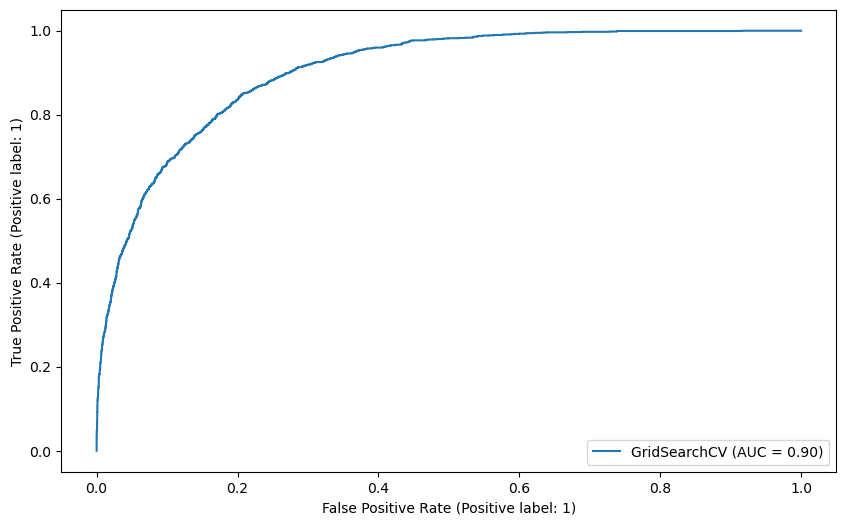

In [64]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid_model, X_test, y_test); 

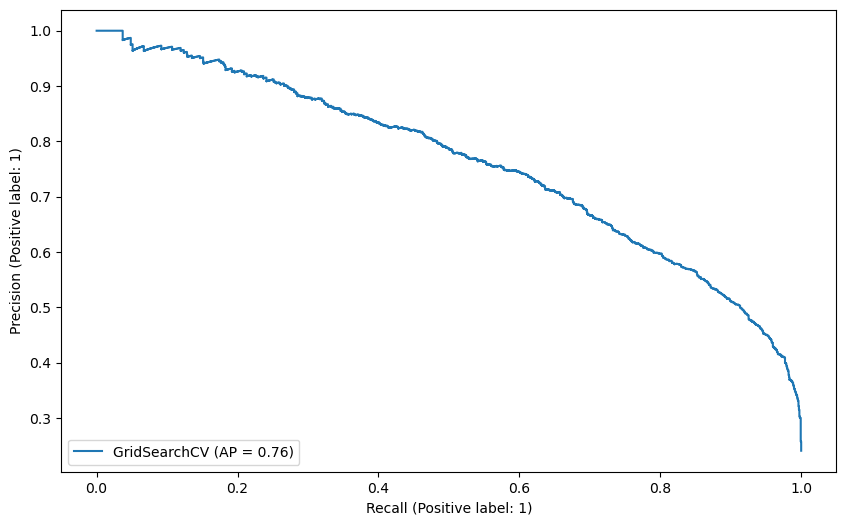

In [65]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(grid_model, X_test, y_test);

# dengeli data setlerinde hem AUC score hem de Average precision score birbirlerine yakın değerler döndürse de
# dengeli data setleri için AUC, dengesiz veri setleri için average precision scorlarını kullanmayı alışkanlık haline getirelim.

# KNN Model

In [66]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled,y_train)
y_pred = knn_model.predict(X_test_scaled)
y_pred_proba = knn_model.predict_proba(X_test_scaled)
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
pd.DataFrame.from_dict(my_dict).sample(10)

Actual  Pred  Proba_1  Proba_0
17615       1     0      0.4      0.6
31184       0     0      0.0      1.0
28875       0     0      0.2      0.8
4283        0     1      0.8      0.2
24096       0     0      0.0      1.0
10474       0     0      0.0      1.0
10139       1     0      0.4      0.6
27111       0     0      0.0      1.0
20504       0     0      0.0      1.0
12184       0     0      0.0      1.0

In [68]:
eval_metric(knn_model,X_train_scaled, y_train, X_test_scaled, y_test)
#knn result

Test_Set
[[4485  455]
 [ 645  923]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4940
           1       0.67      0.59      0.63      1568

    accuracy                           0.83      6508
   macro avg       0.77      0.75      0.76      6508
weighted avg       0.83      0.83      0.83      6508


Train_Set
[[18535  1223]
 [ 1912  4359]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     19758
           1       0.78      0.70      0.74      6271

    accuracy                           0.88     26029
   macro avg       0.84      0.82      0.83     26029
weighted avg       0.88      0.88      0.88     26029



- Grid Search Regression Results were as depicted below:
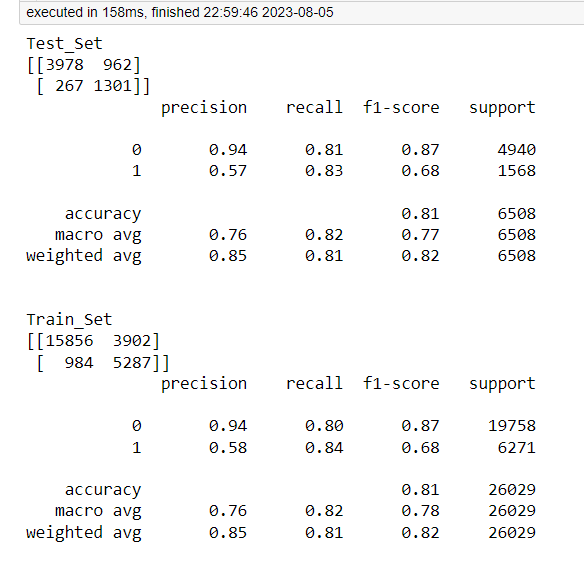

## Elbow Method for K parameter

In [69]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

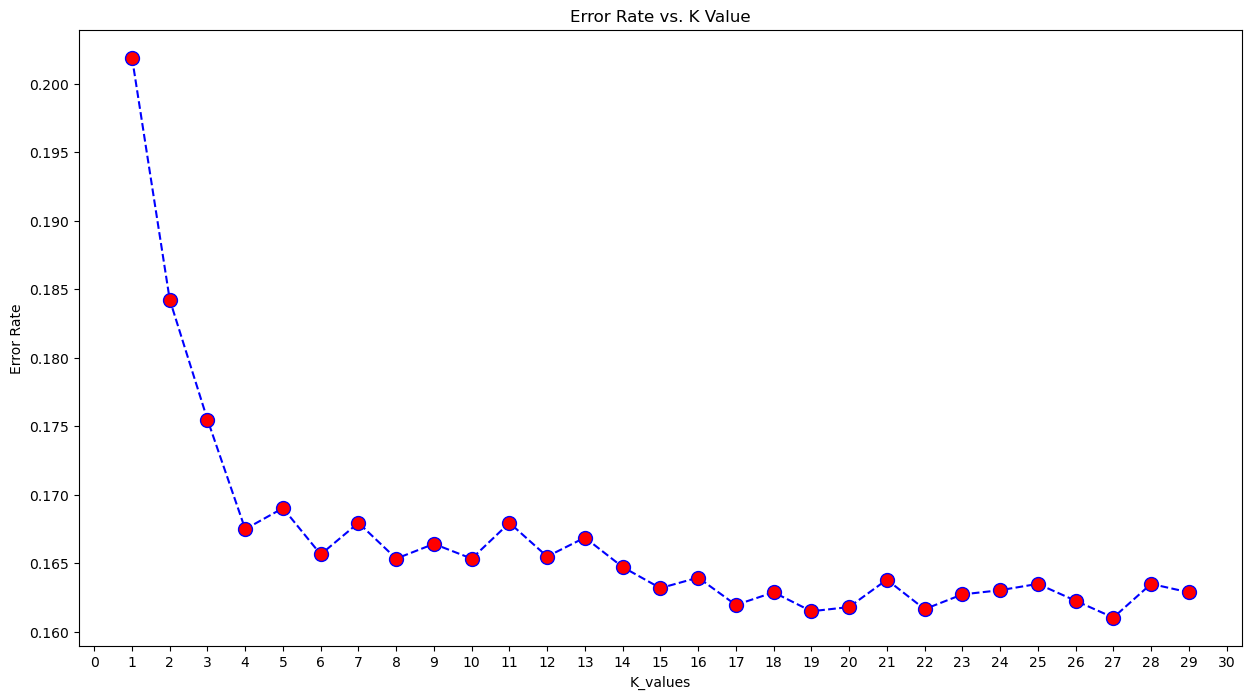

In [70]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.xticks(range(0, 31, 1));

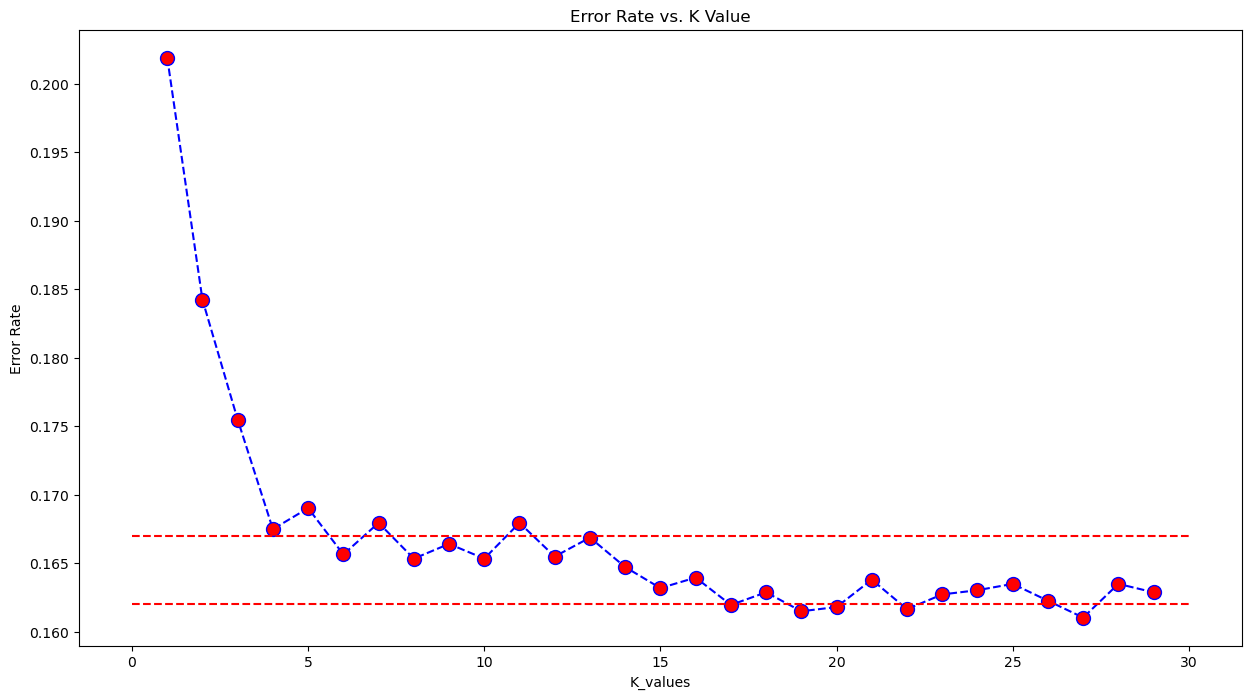

In [77]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y=0.167, xmin = 0, xmax = 30, colors= 'r', linestyles="--") #Bunları ekledim
plt.hlines(y=0.162, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

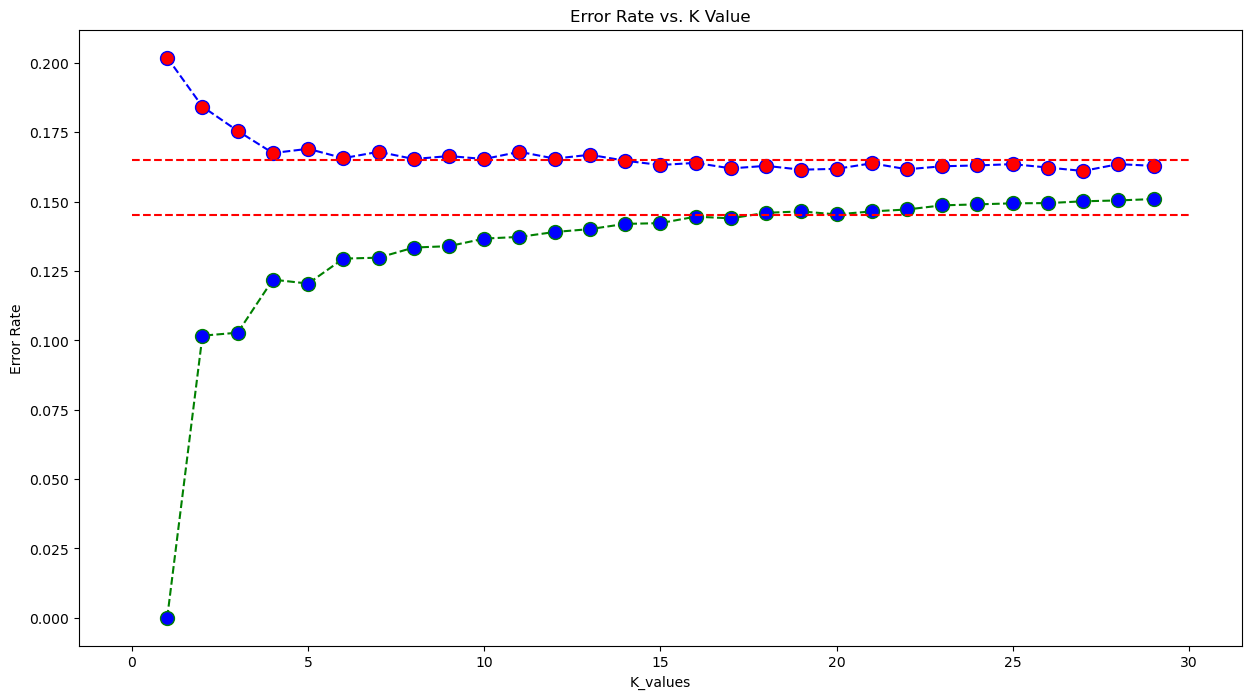

In [81]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y=0.145, xmin = 0, xmax = 30, colors= 'r', linestyles="--") #Bunları ekledim
plt.hlines(y=0.165, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

### Scores by Various K Values

In [82]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
knn5 = Pipeline(steps=operations)

knn5.fit(X_train, y_train)
print('WITH K=5\n')
eval_metric(knn5, X_train, y_train, X_test, y_test)

WITH K=5

Test_Set
[[4485  455]
 [ 645  923]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4940
           1       0.67      0.59      0.63      1568

    accuracy                           0.83      6508
   macro avg       0.77      0.75      0.76      6508
weighted avg       0.83      0.83      0.83      6508


Train_Set
[[18535  1223]
 [ 1912  4359]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     19758
           1       0.78      0.70      0.74      6271

    accuracy                           0.88     26029
   macro avg       0.84      0.82      0.83     26029
weighted avg       0.88      0.88      0.88     26029



In [85]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=19))]
knn19 = Pipeline(steps=operations)

knn19.fit(X_train, y_train)
print('WITH K=19\n')
eval_metric(knn19, X_train, y_train, X_test, y_test)

WITH K=19

Test_Set
[[4570  370]
 [ 681  887]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4940
           1       0.71      0.57      0.63      1568

    accuracy                           0.84      6508
   macro avg       0.79      0.75      0.76      6508
weighted avg       0.83      0.84      0.83      6508


Train_Set
[[18395  1363]
 [ 2449  3822]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     19758
           1       0.74      0.61      0.67      6271

    accuracy                           0.85     26029
   macro avg       0.81      0.77      0.79     26029
weighted avg       0.85      0.85      0.85     26029



In [86]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=10))]
knn10 = Pipeline(steps=operations)

knn10.fit(X_train, y_train)
print('WITH K=10\n')
eval_metric(knn19, X_train, y_train, X_test, y_test)

WITH K=10

Test_Set
[[4570  370]
 [ 681  887]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4940
           1       0.71      0.57      0.63      1568

    accuracy                           0.84      6508
   macro avg       0.79      0.75      0.76      6508
weighted avg       0.83      0.84      0.83      6508


Train_Set
[[18395  1363]
 [ 2449  3822]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     19758
           1       0.74      0.61      0.67      6271

    accuracy                           0.85     26029
   macro avg       0.81      0.77      0.79     26029
weighted avg       0.85      0.85      0.85     26029



## Cross Validate For Optimal K Value

In [89]:
model = KNeighborsClassifier(n_neighbors=19)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
1   0.014927    0.407705       0.833269        0.698152     0.542265  0.610413
2   0.010970    0.391825       0.826738        0.669231     0.555024  0.606800
3   0.009973    0.392851       0.834806        0.688337     0.574163  0.626087
4   0.010969    0.430722       0.839416        0.697543     0.588517  0.638408
5   0.011967    0.423983       0.842105        0.711765     0.578947  0.638522
6   0.011968    0.439027       0.841721        0.709552     0.580542  0.638596
7   0.009900    0.403471       0.850941        0.732039     0.601276  0.660245
8   0.010970    0.395182       0.844026        0.712092     0.591707  0.646341
9   0.010971    0.406548       0.845563        0.721569     0.585987  0.646749
10  0.009973    0.409251       0.837433        0.700000     0.569378  0.627968

In [90]:
df_scores.mean()[2:]

test_accuracy     0.839602
test_precision    0.704028
test_recall       0.576781
test_f1           0.634013
dtype: float64

## Gridsearch Method for Choosing Reasonable K Values

In [93]:
knn_grid = KNeighborsClassifier()

In [94]:
k_values= range(1,30)

In [95]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [96]:
knn_grid_model = GridSearchCV(knn_grid, 
                              param_grid, 
                              cv=10, 
                              scoring= 'f1')

In [97]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [98]:
knn_grid_model.best_params_

{'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}

In [99]:
print('WITH K=9\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=9

Test_Set
[[4523  417]
 [ 666  902]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4940
           1       0.68      0.58      0.62      1568

    accuracy                           0.83      6508
   macro avg       0.78      0.75      0.76      6508
weighted avg       0.83      0.83      0.83      6508


Train_Set
[[18463  1295]
 [ 2191  4080]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     19758
           1       0.76      0.65      0.70      6271

    accuracy                           0.87     26029
   macro avg       0.83      0.79      0.81     26029
weighted avg       0.86      0.87      0.86     26029



In [100]:
knn_model = KNeighborsClassifier(n_neighbors=17).fit(X_train_scaled, y_train) #Elbow gives me power to use 9.
RocCurveDisplay.from_estimator(knn_model, X_test_scaled, y_test)
plt.show()

NameError: name 'RocCurveDisplay' is not defined

In [101]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8812985416838801

# Decision Tree

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Training Model

In [150]:
df.head()

age workclass  fnlwgt     education marital.status         occupation  \
0   90   Unknown   77053       HS-grad        Widowed            Unknown   
1   82   Private  132870       HS-grad        Widowed    Exec-managerial   
2   66   Unknown  186061  Some-college        Widowed            Unknown   
3   54   Private  140359        School       Divorced  Machine-op-inspct   
4   41   Private  264663  Some-college      Separated     Prof-specialty   

  relationship   race     sex  hours.per.week native.country  income  \
0    Unmarried  White  Female              40  United-States       0   
1    Unmarried  White  Female              18  United-States       0   
2    Unmarried  Black  Female              40  United-States       0   
3    Unmarried  White  Female              40  United-States       0   
4    Own-child  White  Female              40  United-States       0   

  capital_diff  
0          Low  
1          Low  
2          Low  
3          Low  
4          Low

In [167]:
DT_model = DecisionTreeClassifier(random_state=101)
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[4293  647]
 [ 663  905]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4940
           1       0.58      0.58      0.58      1568

    accuracy                           0.80      6508
   macro avg       0.72      0.72      0.72      6508
weighted avg       0.80      0.80      0.80      6508


Train_Set
[[19758     0]
 [    1  6270]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19758
           1       1.00      1.00      1.00      6271

    accuracy                           1.00     26029
   macro avg       1.00      1.00      1.00     26029
weighted avg       1.00      1.00      1.00     26029



In [170]:
from yellowbrick.classifier import ClassPredictionError

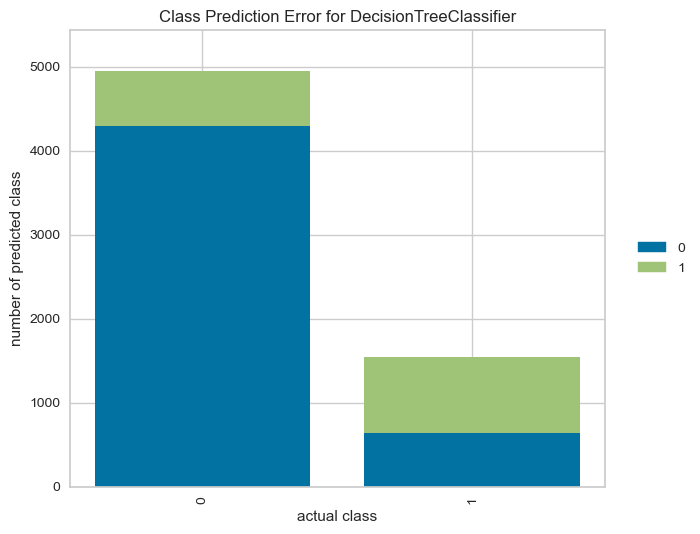

In [171]:
DT_model = DecisionTreeClassifier(random_state=101)
visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [173]:
from sklearn.tree import plot_tree

IndexError: index 79 is out of bounds for axis 0 with size 12

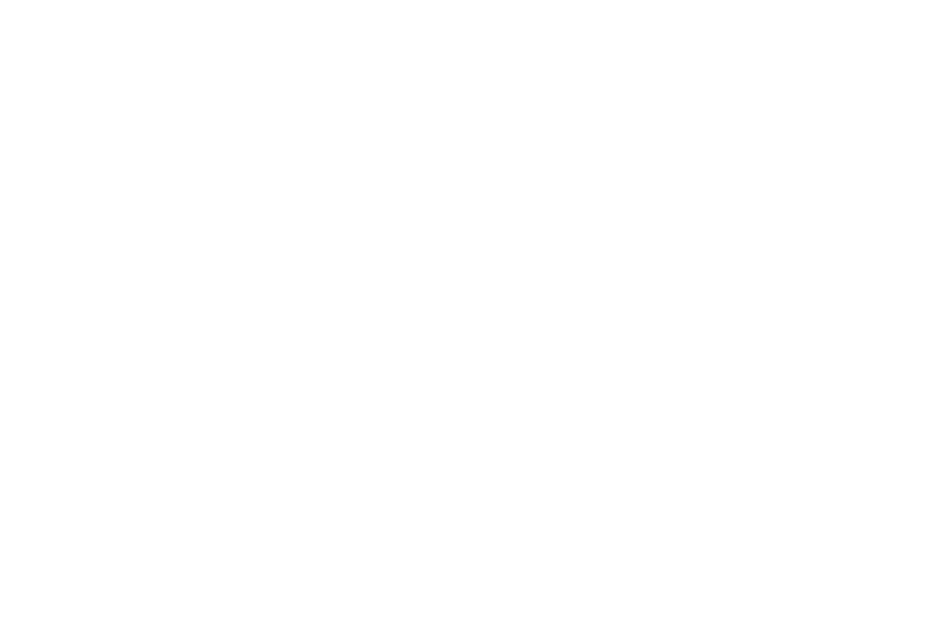

In [178]:
plt.figure(figsize=(12,8))
plot_tree(DT_model, filled=True, rounded=True, feature_names=X.columns);
plt.show()

In [179]:
plt.figure(figsize=(12, 8))
plot_tree(DT_model, filled=True, rounded=True, feature_names=None)
plt.show()

KeyboardInterrupt: 

## Grid Model_DecisionTree

In [180]:
model = DecisionTreeClassifier(random_state=101)

In [181]:
param_grid = {"splitter":["best", "random"],
              "max_features":[2, 3],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6]}

In [182]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1',
                          cv=10,
                          n_jobs = -1)

In [183]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [2, 3],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5, 6],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [184]:
grid_model.best_params_

{'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'splitter': 'random'}

In [185]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[4481  459]
 [ 716  852]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4940
           1       0.65      0.54      0.59      1568

    accuracy                           0.82      6508
   macro avg       0.76      0.73      0.74      6508
weighted avg       0.81      0.82      0.81      6508


Train_Set
[[18998   760]
 [ 1880  4391]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     19758
           1       0.85      0.70      0.77      6271

    accuracy                           0.90     26029
   macro avg       0.88      0.83      0.85     26029
weighted avg       0.90      0.90      0.89     26029



In [189]:
model_dt = DecisionTreeClassifier(class_weight='balanced', 
                                  max_depth=None, 
                                  min_samples_leaf=1,
                                   min_samples_split=36, 
                                  splitter='random',
                                  max_features= 3)

DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [191]:
y_pred = DT_model.predict(X_test)
y_train_pred = DT_model.predict(X_train)

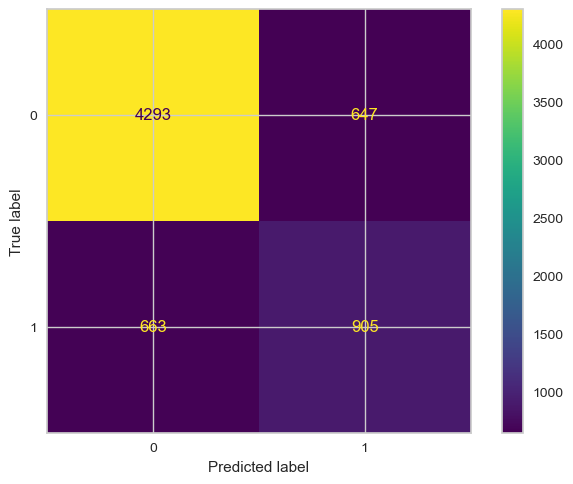

In [193]:
plot_confusion_matrix(DT_model,X_test,y_test)

In [194]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[4293  647]
 [ 663  905]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4940
           1       0.58      0.58      0.58      1568

    accuracy                           0.80      6508
   macro avg       0.72      0.72      0.72      6508
weighted avg       0.80      0.80      0.80      6508


Train_Set
[[19758     0]
 [    1  6270]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19758
           1       1.00      1.00      1.00      6271

    accuracy                           1.00     26029
   macro avg       1.00      1.00      1.00     26029
weighted avg       1.00      1.00      1.00     26029

